In [17]:
import pandas as pd
import numpy as np

In [18]:
x=pd.read_csv("C:/Users/malla/OneDrive/Desktop/gvp/4th sem/python_programs/Downloads/household_power_consumption.csv")
x.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [19]:
x.shape

(86400, 8)

In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86400 entries, 0 to 86399
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   datetime               86400 non-null  object 
 1   Global_active_power    86400 non-null  float64
 2   Global_reactive_power  86400 non-null  float64
 3   Voltage                86400 non-null  float64
 4   Global_intensity       86400 non-null  float64
 5   Sub_metering_1         86400 non-null  float64
 6   Sub_metering_2         86400 non-null  float64
 7   Sub_metering_3         86400 non-null  float64
dtypes: float64(7), object(1)
memory usage: 5.3+ MB


In [21]:
x.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000,86400.000000
mean,1.644244,0.128601,240.964285,6.952023,1.305127,1.878669,7.514213
std,1.335542,0.117621,3.498536,5.629463,6.682567,7.567679,8.671909
min,0.194000,0.000000,224.680000,0.800000,0.000000,0.000000,0.000000
25%,0.396000,0.000000,238.610000,1.800000,0.000000,0.000000,0.000000
50%,1.416000,0.116000,241.220000,5.800000,0.000000,0.000000,0.000000
75%,2.414000,0.196000,243.470000,10.000000,0.000000,1.000000,17.000000
max,9.272000,0.874000,251.700000,40.400000,77.000000,78.000000,20.000000


<AxesSubplot: >

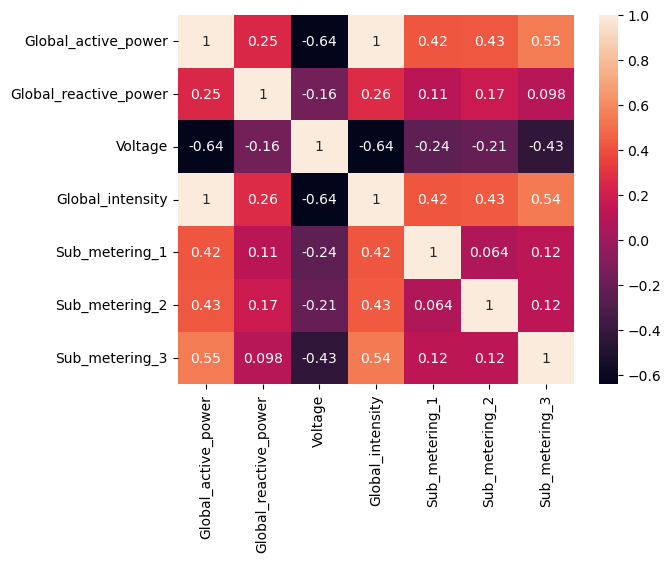

In [22]:
import seaborn as sns
sns.heatmap(x.corr(),annot=True)

In [23]:
y=x['Global_active_power']
y

0        4.216
1        5.360
2        5.374
3        5.388
4        3.666
         ...  
86395    0.636
86396    0.552
86397    0.538
86398    0.524
86399    0.544
Name: Global_active_power, Length: 86400, dtype: float64

In [24]:
x.drop('Global_active_power',axis=1,inplace=True)
x.drop('datetime',axis=1,inplace=True)

In [25]:
x

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,234.84,18.4,0.0,1.0,17.0
1,0.436,233.63,23.0,0.0,1.0,16.0
2,0.498,233.29,23.0,0.0,2.0,17.0
3,0.502,233.74,23.0,0.0,1.0,17.0
4,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...
86395,0.140,241.16,2.6,0.0,0.0,0.0
86396,0.000,240.46,2.2,0.0,0.0,0.0
86397,0.000,239.74,2.2,0.0,0.0,0.0
86398,0.000,241.08,2.2,0.0,0.0,0.0


In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
pred1=model.predict(x_test)

In [30]:
pred1

array([0.24286096, 2.24500103, 2.40897841, ..., 0.48457657, 0.20780769,
       3.66722317])

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse_lr=mean_squared_error(pred1,y_test)
mae_lr=mean_absolute_error(pred1,y_test)
r2_lr=r2_score(pred1,y_test)
print("MSE= ",mse_lr)
print("MAE= ",mae_lr)
print("R2 Score",r2_lr)


MSE=  0.0033301016599974124
MAE=  0.03450790996830502
R2 Score 0.9981164591722004


Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [33]:
poly=PolynomialFeatures(degree=3)
x_train1=poly.fit_transform(x_train)
x_test1=poly.fit_transform(x_test)

In [34]:
preg=LinearRegression()
preg.fit(x_train1,y_train)

LinearRegression()

In [35]:
pred2=preg.predict(x_test1)
pred2

array([0.22876126, 2.24532177, 2.44301661, ..., 0.45787423, 0.24148571,
       3.62494402])

In [36]:
mse_pr=mean_squared_error(pred2,y_test)
mae_pr=mean_absolute_error(pred2,y_test)
r2_pr=r2_score(pred2,y_test)
print("MSE= ",mse_pr)
print("MAE= ",mae_pr)
print("R2 Score",r2_pr)

MSE=  0.002500671876875462
MAE=  0.027236416219841488
R2 Score 0.9985870696237835


svm regressor

In [37]:
from sklearn.svm import SVR
svr= SVR(kernel='linear')
svr.fit(x_train,y_train)
pred3 = svr.predict(x_test)
pred3

array([0.21740925, 2.19377286, 2.38991259, ..., 0.4632526 , 0.15279717,
       3.59464162])

In [38]:
mse_sr=mean_squared_error(pred3,y_test)
mae_sr=mean_absolute_error(pred3,y_test)
r2_sr=r2_score(pred3,y_test)
print("MSE= ",mse_sr)
print("MAE= ",mae_sr)
print("R2 Score",r2_sr)

MSE=  0.005030315957650912
MAE=  0.056602464229912046
R2 Score 0.9971352678686722


DecisionTree regressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)
dt.fit(x_train, y_train)
pred4 = dt.predict(x_test)
pred4

array([0.22866667, 2.276     , 2.488     , ..., 0.45      , 0.252     ,
       3.63      ])

In [40]:
mse_dr=mean_squared_error(pred4,y_test)
mae_dr=mean_absolute_error(pred4,y_test)
r2_dr=r2_score(pred4,y_test)
print("MSE= ",mse_dr)
print("MAE= ",mae_dr)
print("R2 Score",r2_dr)

MSE=  0.0037964218335735105
MAE=  0.027104729031019414
R2 Score 0.9978566484954698


Ridge Regressor

In [41]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.5)
model.fit(x_train, y_train)
pred5 = model.predict(x_test)
pred5

array([0.24286701, 2.24501201, 2.40894914, ..., 0.48457534, 0.20783727,
       3.66720335])

In [42]:
mse_rr=mean_squared_error(pred5,y_test)
mae_rr=mean_absolute_error(pred5,y_test)
r2_rr=r2_score(pred5,y_test)
print("MSE= ",mse_rr)
print("MAE= ",mae_rr)
print("R2 Score",r2_rr)

MSE=  0.003330119390711548
MAE=  0.03450870311887088
R2 Score 0.9981164219047722


Bayesian Regressor

In [43]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(x_train, y_train)
pred6= model.predict(x_test)
pred6

array([0.2428611 , 2.24500128, 2.40897774, ..., 0.48457654, 0.20780837,
       3.66722272])

In [44]:
mse_br=mean_squared_error(pred6,y_test)
mae_br=mean_absolute_error(pred6,y_test)
r2_br=r2_score(pred6,y_test)
print("MSE= ",mse_br)
print("MAE= ",mae_br)
print("R2 Score",r2_br)

MSE=  0.003330102058697048
MAE=  0.034507928009659676
R2 Score 0.9981164583248417


RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50)
model.fit(x_train, y_train)
pred7= model.predict(x_test)
pred7

array([0.22897685, 2.2546    , 2.47896   , ..., 0.43396   , 0.25128   ,
       3.62136   ])

In [46]:
mse_rf=mean_squared_error(pred7,y_test)
mae_rf=mean_absolute_error(pred7,y_test)
r2_rf=r2_score(pred7,y_test)
print("MSE= ",mse_rf)
print("MAE= ",mae_rf)
print("R2 Score",r2_rf)

MSE=  0.0022693947055922007
MAE=  0.02256912757873822
R2 Score 0.9987182744910782


In [47]:
dict={ "Models":["Linear Reg","Polynomial Reg","svm reg","decision reg","ridge reg","bayesian reg"],
       "Mean squared error" : [mse_lr,mse_pr,mse_sr,mse_dr,mse_rr,mse_br],
       "Mean Absolute error" : [mae_lr,mae_pr,mae_sr,mae_dr,mae_rr,mae_br],
       "R2 Score":[r2_lr,r2_pr,r2_sr,r2_dr,r2_rr,r2_br]
     }
er=pd.DataFrame(dict,index=[1,2,3,4,5,6])
er

,Models,Mean squared error,Mean Absolute error,R2 Score
1,Linear Reg,0.003330,0.034508,0.998116
2,Polynomial Reg,0.002501,0.027236,0.998587
3,svm reg,0.005030,0.056602,0.997135
4,decision reg,0.003796,0.027105,0.997857
5,ridge reg,0.003330,0.034509,0.998116
6,bayesian reg,0.003330,0.034508,0.998116


<AxesSubplot: >

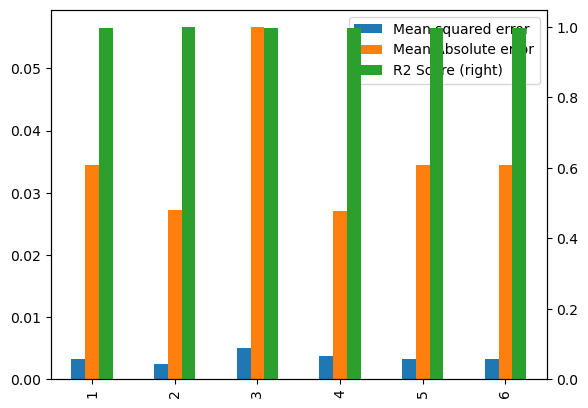

In [48]:
import matplotlib.pyplot as plt
er.plot( kind= 'bar' , secondary_y= 'R2 Score')